# Doğrusal Regresyon ve Kuzenleri
Stratejilerin veri odaklı alınabilmesini sağlayan önemli modelleme teknikleridir
<br>
Yorumlanabilirlik açısından en zengin modellerdir
* Basit Doğrusal Regresyon
* Çoklu Doğrusal Regresyon
* Temel Bileşen Regresyonu
* Kısmi En Küçük Kareler Regresyonu
* Ridge Regresyonu
* Lasso Regresyon
* Elastic Net Regresyonu
* Her Model İçin:
    * Model
    * Tahmin
    * Model Optimizasyonu

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lnrg
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

from warnings import filterwarnings
filterwarnings('ignore')

# Basit Doğrusal Regresyon
Temel amaç, bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır
<br><br>
**Anakitle Teorik Gösterim:** ${\displaystyle Y = \beta _0+\beta X+\epsilon}$
<br>
**Örneklem Gerçek Değerler:** ${\displaystyle y_i=b_0+b_1 x_i + \epsilon _i}$
<br>
**Tahmin Modeli:** ${\displaystyle \hat y_i= b_0+b_1 x_i}$
<br>
**Hatalar/Artıklar:** ${\displaystyle \epsilon _i= y_i+\hat y_i}$
<br><br>
${\displaystyle \beta _0 = }$ Doğrunun y eksenini kestiği nokta
<br>
${\displaystyle \beta _1 = }$ Doğrunun eğimi
<br>
${\displaystyle \epsilon = }$ Hata terimi
<br><br>
${\displaystyle \epsilon _i= y_i-b_0+b_1 x_i}$
<br><br>
${\displaystyle SSE = {\sum_{i=1}^n {(y_i - {\hat y_{i}})^2}}}$
<br><br>
${\displaystyle SSE = {\sum_{i=1}^n {(y_i - ({b_0+b_1 x_i}))^2}}}$
<br><br>
${\displaystyle b_1 = {\frac {{\sum_{i=1}^n}(x_i-{\bar x})(y_i-{\bar y})}{{\sum_{i=1}^n}(x_i-{\bar x})^2}}}$
<br><br>
${\displaystyle b_0= \bar y-b_1 \bar x}$
<br><br>
${\displaystyle \bar y =}$ Bağımlı değişkenin ortalaması
<br>
${\displaystyle \bar x =}$ Bağımsız değişkenin ortalaması

In [37]:
ad = pd.read_csv("Ml2Advertising.csv")
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [38]:
# Başta index numarasını kaldırma
df = df.iloc[:,1:len(df)]
# Alternatif
#df = pd.read_csv("Ml2Advertising.csv", usecols = [1,2,3,4])
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [41]:
# Eksik veri olup olmadığını kontrol etme
df.isnull().values.any()

False

In [42]:
# İlişkileri inceleme
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


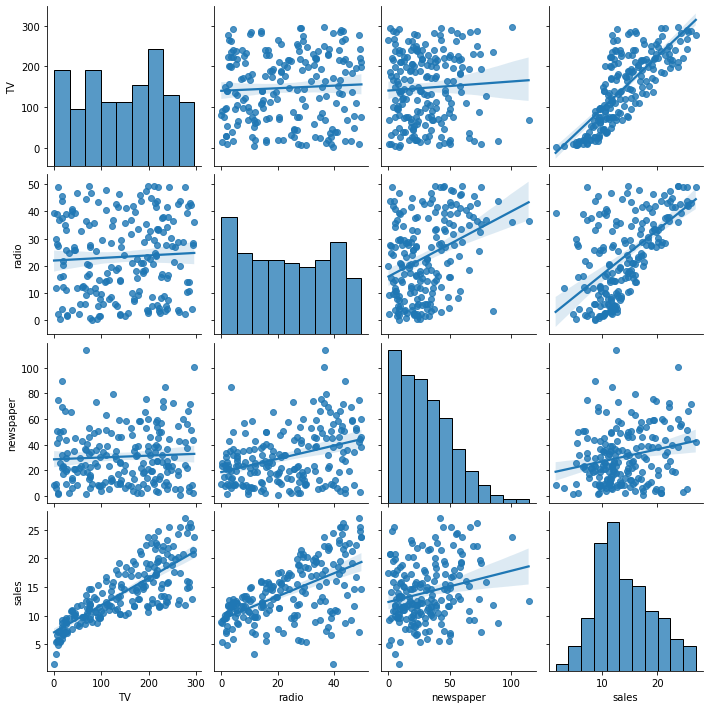

In [43]:
sns.pairplot(df, kind = "reg");

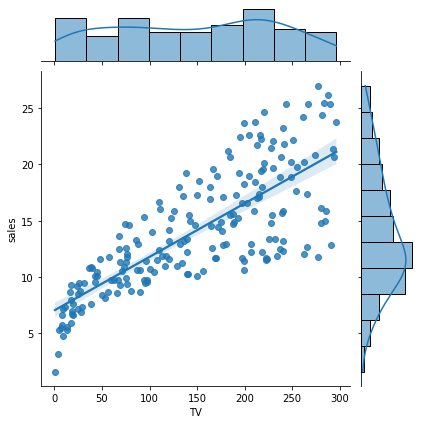

In [44]:
# TV harcamaları ile satışlar arasındaki ilişki
sns.jointplot(x = "TV", y = "sales",data = df, kind = "reg");

## Modelleme Tasarımı

In [45]:

X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [46]:
# Matris işlemi sabit ekleme
X = sm.add_constant(X)
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [47]:
# Bağımlı değişken atama
y = df["sales"]
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [48]:
# Linner model oluşturma
lm = sm.OLS(y,X)

In [49]:
# Model fit etme
model = lm.fit()

In [50]:
# Model çıktısı alma
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           1.47e-42
Time:                        18:09:16   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Dep. Variable:** Bağımlı değişken
<br>
**R-squared:** R-kare değeri (Bağımsız değişken ile bağımlı bir değişkeni açıklama başarısıdır-Açıklanabilirlik oranıdır)
<br>
**Adj. R-squared:** Düzeltilmiş R-kare değeri (R-kare değerinin aksine her R-kare parametresine eklenmesine karşı düzenler)
<br>
**F-statistic:** Modelin anlamlılığının anlaşılması için kurulan test istatistiğidir
<br>
**Prob (F-statistic):** F-statistic değerinin p-value değeridir
<br><br>
**const:** ${\displaystyle b_0}$ değerini ifade eden sabittir
<br>
**coef:** coef değerleri ${\displaystyle b_0}$ ve ${\displaystyle b_1}$ katsayılarını ifade eder
<br>
**std err:** standart hata değeridir
<br>
**t:** T-istatistik değeridir
<br>
**P>|t|:** T-istatistik değerinin p-value değeridir
<br>
**[0.025-0.975]:** Güven aralığını belirtir

### Alternatif

In [51]:
lm = smf.ols("sales ~ TV",df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           1.47e-42
Time:                        18:09:16   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# b0 ve b1 katsayıları
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [53]:
# Katsayı detayları
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [54]:
# Katsayıların güven aralıkları
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [55]:
# Modelin anlamlılığına ilişkin isttaistiksel veriler
model.f_pvalue

1.4673897001947095e-42

In [56]:
print(f"f_p-value: {round(model.f_pvalue,3)}")

f_p-value: 0.0


In [57]:
print(f"f_value: {round(model.fvalue,2)}")

f_value: 312.14


In [58]:
print(f"t_value: {round(model.tvalues[0:1],2)}")

t_value: Intercept    15.36
dtype: float64


In [59]:
# Hata toplamı ortalaması
model.mse_model

3314.6181668686486

In [60]:
# Açıklanabilirlik oranı
model.rsquared

0.611875050850071

In [61]:
# Düzeltiliş açıklanabilirlik oranı
model.rsquared_adj

0.6099148238341623

In [62]:
# Tahmin edilen değerler
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [63]:
# Gerçek değerler
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [64]:
# Denklem oluşturma
print(f"Sales = {round(model.params[0],2)} + TV*{round(model.params[1],2)}")

Sales = 7.03 + TV*0.05


**Yorum**

Örnek: Tv reklamlarına 10K yatırım yapılacak
<br>
Fakat bu yatırımdan gelen gelir ne kadar olur?

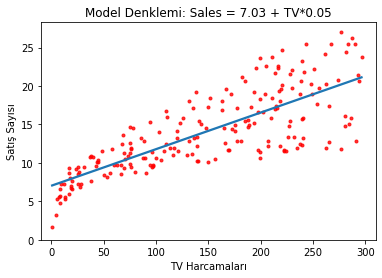

In [65]:
# Görsel Yorumlama
g = sns.regplot(df["TV"], df["sales"], ci = None, scatter_kws={"color":"r", "s":9})
g.set_title(f"Model Denklemi: Sales = {round(model.params[0],2)} + TV*{round(model.params[1],2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [66]:
# sklearn ile doğrusal model kurma

In [67]:
X = df[["TV"]]
y = df["sales"]
reg = lnrg()
model = reg.fit(X, y)

In [68]:
# b0 katsayısı
print(f"b0 = {round(model.intercept_,3)} \nb1 = {round(model.coef_[0],3)}")

b0 = 7.033 
b1 = 0.048


In [69]:
# Model skoru (R-kare değeri)
model.score(X, y)

0.611875050850071

In [70]:
# Tahmin edilen değer
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

## Tahmin

Model Denklemi
<br>
Sales = 7.03 + TV*0.04
<br>
Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [71]:
7.03 + 30*0.04

8.23

In [72]:
X = df[["TV"]]
y = df["sales"]
reg = lnrg()
model = reg.fit(X, y)

In [73]:
# Gerçek değererle tahmin etme işlemi
model.predict([[30]])

array([8.45869276])

In [74]:
# İstenilen birim değerler için toplu tahmin etme
yeni_veri = [[5],[90],[200]]
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

## Artıklar ve Makine Öğrenmesindeki Önemi

In [75]:
lm = smf.ols("sales ~ TV",df)
model = lm.fit()

In [76]:
# Hata kareleri ortalamasını tespit etme
mse = mean_squared_error(y, model.fittedvalues)
mse

10.512652915656757

In [77]:
# Hata kareleri ortalamasının karekökünü tespit etme
rmse = np.sqrt(mse)
rmse

3.2423221486546887

In [78]:
# Nesne üzerinden tahmin yapma
reg.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

**Önemli:** reg değişkenine fit özelliği atamak için model değişkeni çağırıldı ve nesne ataması yapıldı. Eğer değişkene atama işlemi olmasaydı yukarıdaki tahmin fonksiyonu çalışmaz.

In [79]:
# Gerçek değerler
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [80]:
# Karşılaştırma tablosu (artıkları tespit edebilmek için)
k_t = pd.DataFrame({"gercek_y":y[0:10],"tahmin_y":reg.predict(X)[0:10]})
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [81]:
# Hata ortalamasını tespit etme
# Önce eksi değerlerden kurtulmak için karesini alma
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [82]:
# Ortalama hata
np.sqrt(np.mean(k_t["hata_kare"]))

3.048007599996775

<hr>

In [83]:
# Altenatif
k_t["hata_abs"] = np.abs(k_t["hata"])
k_t

,gercek_y,tahmin_y,hata,hata_kare,hata_abs
0,22.1,17.970775,4.129225,17.050503,4.129225
1,10.4,9.147974,1.252026,1.567569,1.252026
2,9.3,7.850224,1.449776,2.101851,1.449776
3,18.5,14.234395,4.265605,18.195390,4.265605
4,12.9,15.627218,-2.727218,7.437719,2.727218
5,7.2,7.446162,-0.246162,0.060596,0.246162
6,11.8,9.765950,2.034050,4.137358,2.034050
7,13.2,12.746498,0.453502,0.205664,0.453502
8,4.8,7.441409,-2.641409,6.977040,2.641409
9,10.6,16.530414,-5.930414,35.169814,5.930414


In [84]:
np.mean(k_t["hata_abs"])

2.5129388421137904

<hr>

In [85]:
# Modelin artıklarını elde etme fonksiyonu
model.resid[0:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

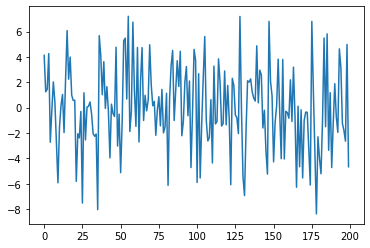

In [86]:
plt.plot(model.resid);

# Çoklu Doğrusal Regresyon
Temel amaç, bağımlı ve bağımsız değişkenler arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.
<br>
${\displaystyle {\sum_{i=1}^n}e_i^2 = \sum_{i=1}^n (y_i - \hat y_i)^2}$
<br><br>
${\displaystyle \hat \beta = (X^T.X)^{-1} X^T.Y}$
<br><br>
**Doğrusal Regresyon Varsayımları**
* Hatalar normal dağılır
* Hatalar birbirinden bağımsızdır ve aralarında otokorelayon yoktur
* Her bir gözlem için hata terimleri varyansları sabittir
* Değişkenler ile hata terimi arasında iişki yoktur
* Bağımsız değişkenler arasında çoklu doğrusal ilişki problemi yoktur

**Regresyon Modellerinin avantajları**
* İyi anlaşılırsa tüm ML ve DL konuları çok rahat kavranır
* Doğrusallık nedensellik yorumları yapılabilmesini sağlar, bu durum aksiyoner ve stratejik modelleme imkanı verir
* Değişkenlerin etki düzeyleri ve anlamlılıkları değerlendirilebilir
* Bağımlı değişkendeki değişkenlğin açıklanma başarısı ölçülebilir
* Model anlamlılığı değerlendirilebilir

**Regresyon Modellerinin Dezavantajları**
* Varsayımları vardır
* Aykırı gözleme duyarlıdır

In [87]:
ad = pd.read_csv("Ml2Advertising.csv",usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [88]:
X = df.drop("sales",axis = 1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [89]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [90]:
training = df.copy()

In [91]:
training.shape

(200, 4)

## Statsmodels

In [92]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()

In [93]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                   1.28e-137
Time:                        18:09:29   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


## scikit-learn model

In [95]:
lm = lnrg()
model = lm.fit(X_train, y_train)

In [96]:
model.intercept_

2.9790673381226256

In [97]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

## Tahmin
<br><br>
Model denklemi:
<br><br>
Sales = 2.97 + TV0.04 + radio0.18 + newspaper*0.002
<br><br>
Örneğin 30 birim TV harcaması, 0 birim radio harcaması, 40 birimde gazete harcaması olduğunda satışların tahmini ne olur?

In [98]:
yeni_veri = [[30],[10],[40]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [99]:
# Tahmin edilen değerler
model.predict(yeni_veri)

array([6.32334798])

In [100]:
# Eğitim setinin hatasına erişme
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rmse

1.644727765644337

In [101]:
# Test setinin hatasına erişme
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse

1.7815996615334502

## Model Tuning/Model Doğrulama

In [102]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [103]:
X = df.drop("sales", axis = 1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, random_state = 144)
lm = lnrg()
model = lm.fit(X_train, y_train)

In [104]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1.6676235399377077

In [105]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.730217189221053

In [106]:
model.score(X_train, y_train)

0.9012645380840075

In [107]:
cross_val_score(model, X, y, cv = 10, scoring = "r2").mean()

0.8853562237979616

In [108]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

0.8924943964761164

In [109]:
np.sqrt(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")).mean()

1.6498661227221327

In [110]:
np.sqrt(-cross_val_score(model, X_test, y_test, cv = 10, scoring = "neg_mean_squared_error")).mean()

1.5071383292196772

# PCR - Temel Bileşen Regresyonu
Değişkenlere boyut indirgeme uygulandıktan sonra çıkan bileşenlere regresyon modeli kurulması fikrine dayanır

In [111]:
hit = pd.read_csv("Ml2Hitters.csv")
df = hit.copy()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [112]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [113]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [114]:
# Dummy değişkene atama
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [115]:
# Dummy tuzağından kurtarma
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")
training = df.copy()
print(f"training: {training.shape}")

X_train: (197, 19)
y_train: (197,)
X_test: (66, 19)
y_test: (66,)
training: (263, 20)


In [116]:
# Verinin ölçeklendirilmesi ve bileşenlerini oluşturma
pca = PCA()
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [117]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 4)*100)[0:10]

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28])

In [118]:
lm = lnrg()
pcr_model = lm.fit(X_reduced_train, y_train)
pcr_model.intercept_

543.4834416243655

In [119]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

## Tahmin

In [120]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [121]:
np.sqrt(mean_squared_error(y_train, y_pred))

289.3292825564976

In [122]:
df["Salary"].mean()

535.9258821292775

In [123]:
r2_score(y_train, y_pred)

0.5770075250410179

In [124]:
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))
y_pred = pcr_model.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, y_pred))

405.15753641499657

## Model Tuning

In [125]:
lm = lnrg()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

390.7914255682224


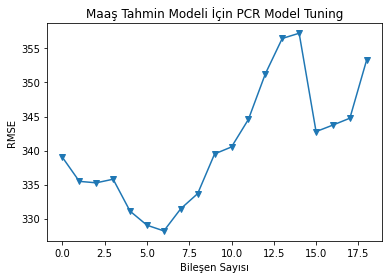

In [126]:
cv_10 = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 1)
lm = lnrg()
RMSE = []
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)
    
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

In [127]:
lm = lnrg()
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)
y_pred = pcr_model.predict(X_reduced_train[:,0:6])
print(np.sqrt(mean_squared_error(y_train, y_pred)))

308.8265983094501


In [128]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

393.11987000962233


# PLS - Kısmi En Küçük Kareler Regresyonu

Değişkenlerin daha az sayıda ve aralarında çoklu doğrusal bağlantı problemi olmayan bileşenlere indirgenip regresyon modeli kurulması fikrine dayanır
<br><br>
* Çok boyutluluk laneti p > n
    * Çoklu doğrusal bağlantı problemi
* PLS de PCR gibi bağımsız değişkenlerin doğrusal kombinasyonlarını bulur. Bu doğrusal kombinasyonlar bileşen ya da leatent değişken olarak adlandırılır
* PLS NIPALS'in özel bir halidir, iteratif olarak bağımlı değişken ile yüksek korelasyona sahip değişkenler arasındaki gizli (latent) ilişkiyi bulmaya çalışır
* PCR'da doğrusal kombinasyonlar yani bileşenler **bağımsız değişken uzağındaki değişkenliği** maksimum şekilde özetleyecek şekilde oluşturulur
    * Bu durum bağımlı değişkeni açıklama yeteneği olmamasına sebep olmaktadır
* PLS'te ise **bileşenler bağımlı değişken ile olan kovaryası** maksimum şekilde özetleyecek şekilde oluşturulur
* Değişkenler atılmak istenmiyorsa ve açıklanabilirlik aranıyorsa: PLS kullanılır
* PLS: gözetimli boyut indirgeme prosedürü, PCR: gözetimsiz boyut indirgeme prosedürü olarak görülebilir
* İki yönteminde bir tuning parametresi vardır ve o da bileşen sayısıdır
* Optimum bileşen sayısını belirlemek için CV (Cross Validation) yöntemi kullanılır

In [129]:
hit = pd.read_csv("Ml2Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [130]:
# pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)
pls_model = PLSRegression().fit(X_train, y_train)
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

## Tahmin

In [131]:
pls_model.predict(X_train)[0:10]

array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077],
       [987.49530026],
       [120.63097106],
       [289.9263406 ],
       [663.41886918],
       [817.90486641]])

In [132]:
y_pred = pls_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

310.1167593109696

In [133]:
r2_score(y_train, y_pred)

0.5140424486535481

In [134]:
y_pred = pls_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

In [135]:
r2_score(y_test, y_pred)

0.2678940112232916

## Model Tuning

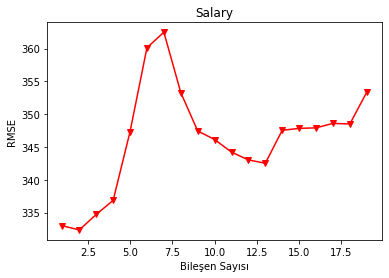

In [136]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [137]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)
y_pred = pls_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

# Ridge Regresyon

Amaç, hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır
<br><br>
${\displaystyle SSE = {\sum_{i=1}^n (y_i - {\hat y_i})^2}}$
<br><br>
${\displaystyle SSE_{L_2} = {\sum_{i=1}^n(y_i-{\hat y_i})^2 + \lambda {\sum_{j=1}^P}\beta_j^ 2}}$
<br><br>
${\displaystyle \lambda (Lambda) =}$ Ayar Parametresi
<br><br>
${\displaystyle {\sum_{j=1}^P}\beta_j^2 =}$ Ceza Terimi
<br><br>
* Aşırı öğrenmeye karşı dirençli
* Yanlıdır fakat varyansı düşüktür (Bazen yanlı modeller daha çok tercih edilir)
* Çok fazla parametre olduğunda EKK'ye göre daha iyidir
* Çok boyutluluk lanetine karşı çözüm sunar
* Çoklu doğrusal bağlantı problemi olduğunda etkilidir
* Tüm değişkenler ile model kurar, **ilgisiz değişkenleri modelden çıkarmaz, katsayılarını sıfıra yaklaştırır**
* ${\displaystyle \lambda}$ kritik roldedir, iki terimin (formüldeki) göreceli etkilerini kontorl etmeyi sağlar
* ${\displaystyle \lambda}$ için iyi bir değer bulunması önemlidir, bunun için CV yöntemi kullanılır

In [138]:
hit = pd.read_csv("Ml2Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [139]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1)

In [140]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [141]:
10**np.linspace(10,-2,100)*0.5 

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

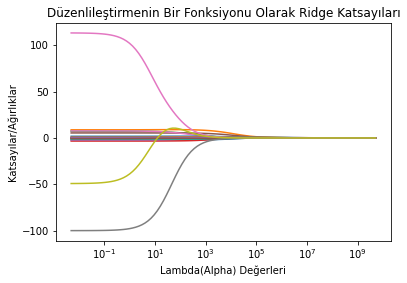

In [142]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

## Tahmin

In [143]:
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

357.05179222828446

In [144]:
r2_score(y_test, y_pred)

0.41108449050676066

## Model Tuning

In [145]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [146]:

ridge_cv = RidgeCV(alphas = lambdalar, scoring = "neg_mean_squared_error",normalize = True)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [147]:
ridge_cv.alpha_

0.7599555414764666

In [148]:
# Fİnal modeli
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, normalize = True).fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

386.6826429756415

# Lasso Regresyon

Amaç, hata kareler toplamını minimize eden katsayılara bi ceza uygularak bulmaktır
<br><br>
${\displaystyle SSE_{L_2} = {\sum_{i=1}^n(y_i-{\hat y_i})^2 + \lambda {\sum_{j=1}^P}|\beta_j|}}$
<br><br>
${\displaystyle \lambda (Lambda) =}$ Ayar Parametresi
<br><br>
${\displaystyle {\sum_{j=1}^P}|\beta_j| =}$ Ceza Terimi
<br><br>
* Ridge regresyonun ilgili-ilgisiz tüm değişkenleri modelde bırakma dezavantajını gidermek için önerilmiştir
* Lasso'da katsayıları sıfıra yaklaştırır
* Fakat L1 normu ${\displaystyle \lambda}$ yeteri kadar büyük olduğunda bazı katsayıları sıfır yapar
    * Böylece değişken seçimi yapmış olur
* ${\displaystyle \lambda}$'nın doğru seçilmesi çok önemlidir, burada da CV kullanılır
* Ridge ve Lasso yöntemleri birbirinden üstün değildir
<br><br>
${\displaystyle \lambda}$ **ayar parametresinin belirlenmesi**
* ${\displaystyle \lambda}$'nın sıfır olduğu yr EKK'dır, HKT'yi (Hata kareler toplamı) minimum yapan ${\displaystyle \lambda}$ aranır
* ${\displaystyle \lambda}$ için belirli değerleri içeren bir küme seçilir ve her birisi için CV test hatası hesaplanır
* En küçük CV değerini veren ${\displaystyle \lambda}$, ayar parametresi olarak seçilir
* Son olarak seçilen bu ${\displaystyle \lambda}$ ile model yeniden tüm gözlemlere fit edilir

In [149]:
hit = pd.read_csv("Ml2Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [150]:

lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)
lasso_model

Lasso(alpha=0.1)

In [151]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

Text(0, 0.5, 'weights')

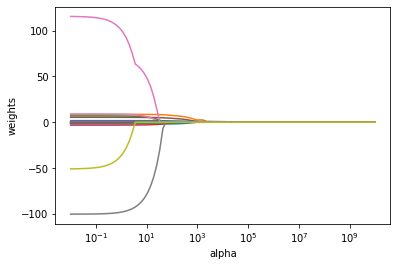

In [152]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

## Tahmin

In [153]:
lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [154]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.75452701487694

## Model Tuning

In [155]:
lasso_cv_model = LassoCV(alphas = None, cv = 10, max_iter = 10000, normalize = True).fit(X_train, y_train)
lasso_cv_model.alpha_

0.39406126432470073

In [156]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.52263769583675

# ElasticNet Regresyonu

Amaç, hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır
<br>
ElasticNEt L1 ve L2 yaklaşımlarını birlştirir
<br><br>
${\displaystyle SSE_{Enet} = {\sum_{i=1}^n(y_i-{\hat y_i})^2 + \lambda _1 {\sum_{j=1}^P}\beta_j^2 + \lambda _2 {\sum_{j=1}^P}|\beta_j|}}$

In [157]:
hit = pd.read_csv("Ml2Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [158]:
enet_model = ElasticNet().fit(X_train, y_train)
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [159]:
enet_model.intercept_

-6.465955602112558

## Tahmin

In [160]:
enet_model.predict(X_test)

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123,  702.9157117 ,  931.50283407,
        184.87939803,  385.14973787,  325.38944176,  546.99346574,
        774.28001821,  101.83114992, 1250.86758812,  370.67651244,
        442.05734523,  781.17288513,  578.63736538,  609.31927808,
        608.31719597,  227.46556223,  921.85505228,  301.1202457 ,
        386.31721051,  133.61143326,  162.28505608,   88.29793182,
        359.9068418 ,  422.51268445,  265.8663769 ,  355.70450908,
       1329.36312363,  125.05506935,   82.74580002,  269.17483075,
        117.13319397,  274.13484779,  648.4957249 ,  409.47065999,
        846.27919406,  712.04817644,  341.10596674,  368.24259678,
        305.70477656,  680.05724792,  716.13640636,  295.93204262,
        773.06445823,  249.28224916,  221.46794589,  541.2713245 ,
        611.50212372,  770.80228024,  168.45143906, 1159.05660

In [161]:
y_pred = enet_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181245

In [162]:
r2_score(y_test, y_pred)

0.4107022246932691

## Model Tuning

In [163]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)
enet_cv_model.alpha_

5230.7647364798695

In [164]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train, y_train)
y_pred = enet_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

394.1528056321879

**Not:** Bu model için en iyi değeri lasso regresyonu vermiştir